# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

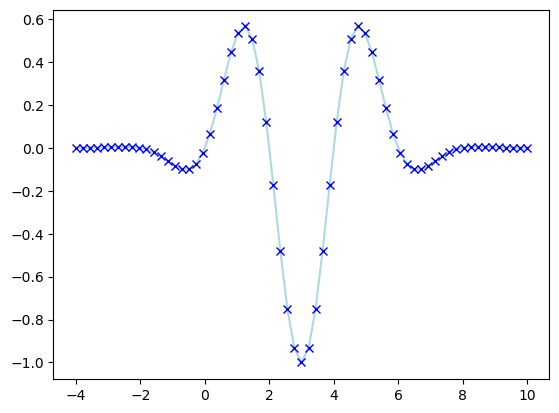

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

# plt.style.use('dark_background')
plt.style.use('default')

nump=65
x0=-4.0 
xf=10.0

xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

def h(x): 
    # Solves h as a function of x 
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

# Visualize 
hh = h(xx)
plt.plot(xx, hh, color='lightblue')
plt.plot(xx, hh, 'x', color='b')

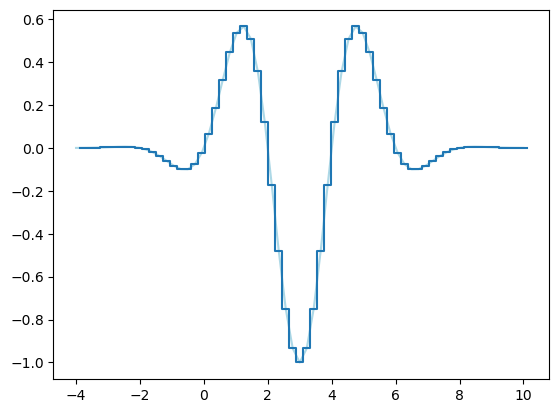

In [2]:
nint = 64 # Number of intervals 
nump = 65 # Number of points 

plt.plot(xx, hh, color='lightblue')
hist = plt.step((xx)+(xx[1]-xx[0])/2, hh)

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

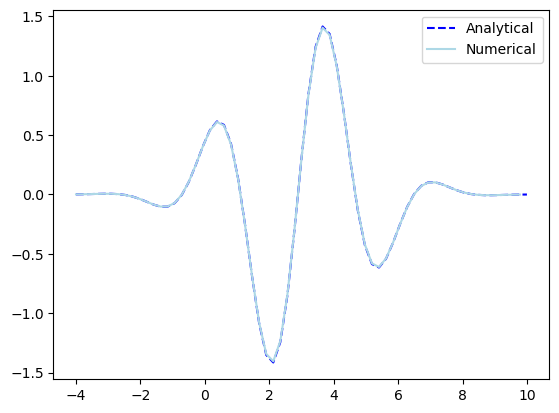

In [3]:
hp = nm.deriv_dnw(xx, hh) # Numerical derivative 

def hp_calc(x): 
    # Analytical derivative
    return np.exp(-0.16*(-3+x)**2)  *(1.5708*np.cos((np.pi*x)/2) - (-0.96 + 0.32*x) * np.sin((np.pi*x)/2))

plt.plot(xx, hp_calc(xx+(xx[1]-xx[0])/2), label='Analytical', color='b', linestyle='--')
plt.plot(xx[:-1], hp, label='Numerical',  color='lightblue')
plt.legend()

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

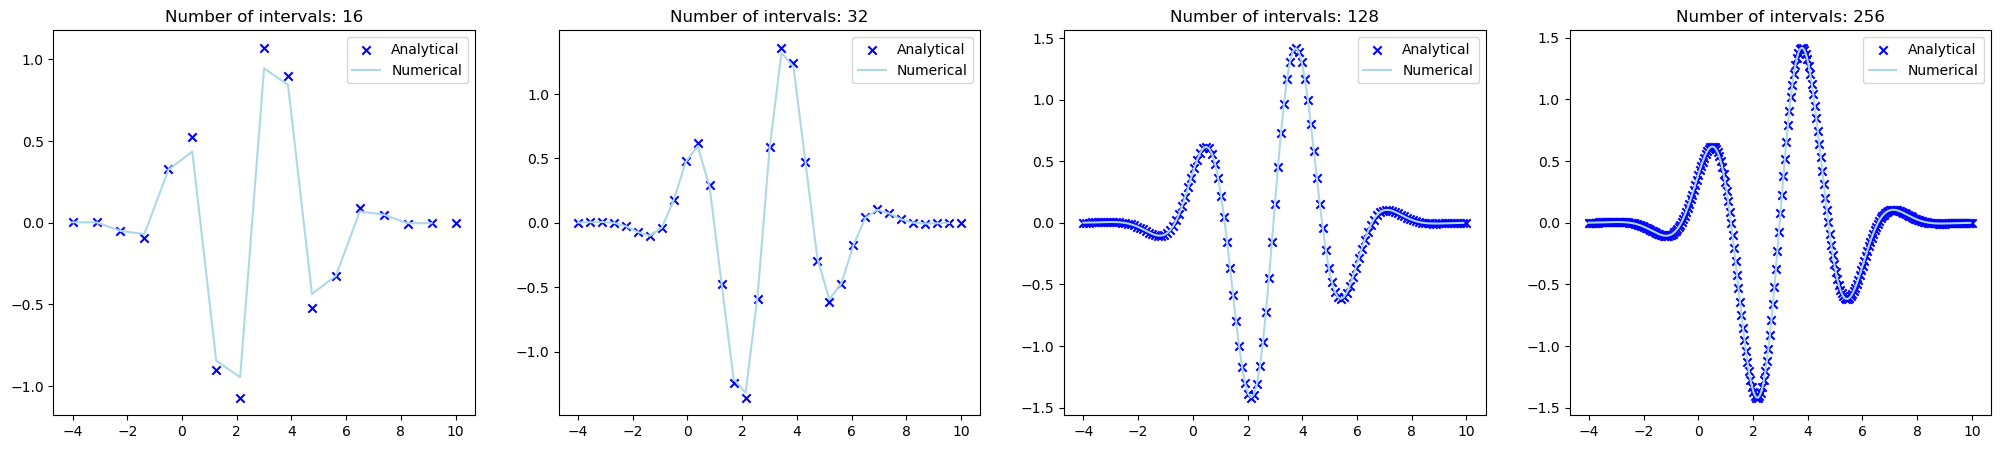

In [25]:
def plot_approx(nint, axs, semology=False): 
    # Function for visualizing the deteriation of the approximation depending on number of intervals 
    nump = nint + 1 
    x = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    hp = nm.deriv_dnw(x, h(x))

    axs.title.set_text(f'Number of intervals: {nint}')
    axs.scatter(x, hp_calc(x + (x[1]-x[0])/2), label='Analytical', color='b', marker='x')
    axs.plot(x[:-1], hp,    label='Numerical',  color='lightblue')
    axs.legend()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,5))
plot_approx(16, ax1)
plot_approx(32, ax2)
plot_approx(128, ax3)
plot_approx(256, ax4)

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

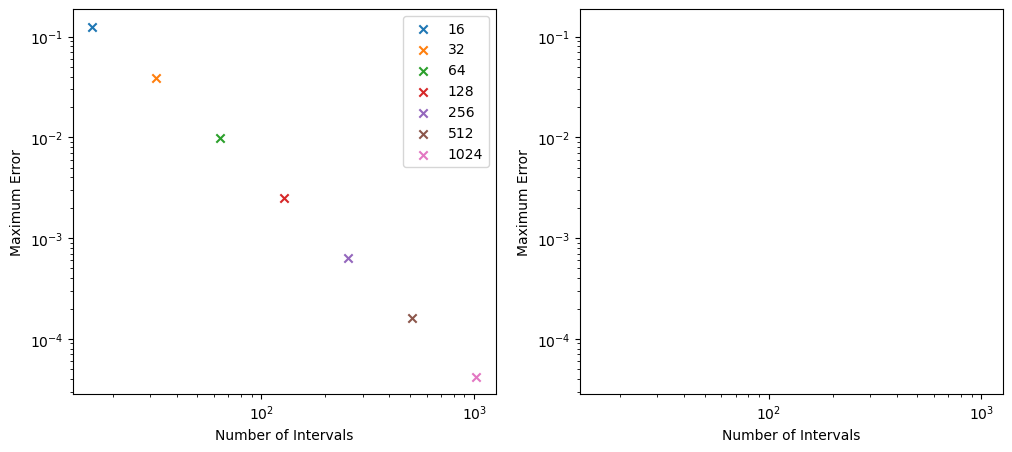

In [34]:
def calc_error(x): 
    hp_calc_small = hp_calc(x[:-1] + (x[1]-x[0])/2)
    hp = nm.deriv_dnw(x, h(x))

    error = np.max(np.abs(hp_calc_small - hp))
    dxs = x[1] - x[0]

    return error, dxs

nint       =  [16, 32, 64, 128, 256, 512, 1024]
error_list = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
for n in nint: 
    nump = n + 1 
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list.append(calc_error(xx)[0])

    ax1.scatter(n, calc_error(xx)[0], label=f'{n}', marker='x')
    ax1.legend()

    ax2.semilogy(n, calc_error(xx)[0]) # ??? 

ax1.set_xlabel("Number of Intervals"); ax1.set_ylabel("Maximum Error")
ax1.set_xscale('log');                 ax1.set_yscale('log')
ax2.set_xlabel("Number of Intervals"); ax2.set_ylabel("Maximum Error")
ax2.set_xscale('log');                 ax2.set_yscale('log')

## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

Text(0, 0.5, 'Maximum Error')

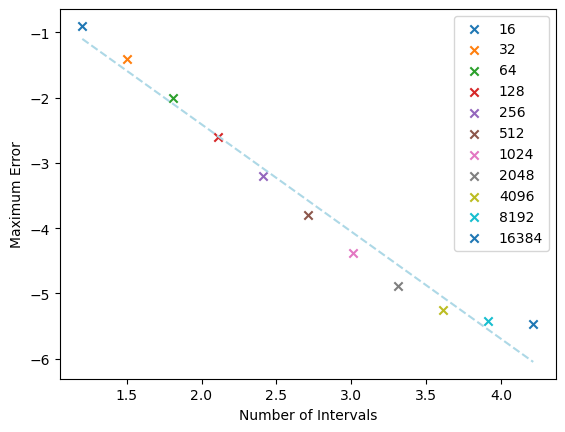

In [7]:
nint =  [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
error_list = []

for n in nint: 
    nump = n + 1 
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list.append(calc_error(xx)[0])

    plt.scatter(np.log10(n), np.log10(calc_error(xx)[0]), label=f'{n}', marker='x')
    plt.legend()

p = np.poly1d(np.polyfit(np.log10(nint), np.log10(error_list), deg=1))
plt.plot(np.log10(nint), p(np.log10(nint)), color='lightblue', linestyle='--')

plt.xlabel("Number of Intervals"); plt.ylabel("Maximum Error")

The final three points are not behaving linearly, so we try dropping these from the interpolation. 

-1.9283725332226878
Error of quadratic dependence: 1.9e+00


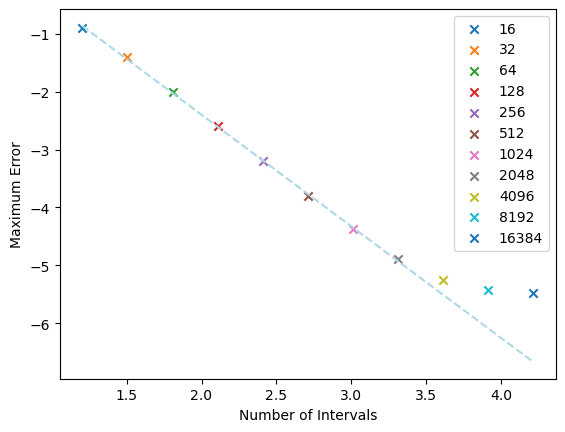

In [11]:
for n in nint: 
    nump = n + 1 
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
    plt.scatter(np.log10(n), np.log10(calc_error(xx)[0]), label=f'{n}', marker='x')
    plt.legend()

p = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list[:-3]), deg=1))
plt.plot(np.log10(nint), p(np.log10(nint)), color='lightblue', linestyle='--')

plt.xlabel("Number of Intervals"); plt.ylabel("Maximum Error")

slope = p.coef[0] # Get the slope 
print(slope)
print(f"Error of quadratic dependence: {np.abs(np.sum(error_list)/len(error_list) - slope):.1e}")

## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.